In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import pymysql as mysql
import matplotlib.pyplot as plt
import os
import warnings
import getpass
warnings.filterwarnings('ignore')

### Connecting pandas to MySQL database

In [2]:
conn = mysql.connect(host='localhost',
                    port = int(3306),
                    user = 'root',
                    passwd=getpass.getpass('Enter password:'),
                    db="Airbnb_Seattle")

df = pd.read_sql_query("Show tables ", conn)
print(df)

Enter password:········
  Tables_in_airbnb_seattle
0                 calendar
1                 listings
2                  reviews


In [3]:
# Sql statement to extract the Calender dataset
cal_df = pd.read_sql("select * from calendar", conn)
cal_df

,listing_id,date,available,price
0,3335,2016-01-04,f,None
1,3335,2016-01-05,f,None
2,3335,2016-01-06,f,None
3,3335,2016-01-07,f,None
4,3335,2016-01-08,f,None
...,...,...,...,...
1048570,10340165,2016-12-29,t,$43.00
1048571,10340165,2016-12-30,t,$43.00
1048572,10340165,2016-12-31,t,$43.00
1048573,10340165,2017-01-01,t,$43.00


### EDA Analysis

In [4]:
calendar=pd.read_csv('Dataset/calendar.csv',index_col = False, delimiter = ',')
reviews=pd.read_csv('Dataset/reviews.csv',index_col = False, delimiter = ',')
listings=pd.read_csv('Dataset/listings.csv',index_col = False, delimiter = ',')

In [12]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [9]:
# shape of the dataframe
print(f'calendar dataframe shape {calendar.shape}')

calendar dataframe shape (1048575, 4)


In [10]:
# print the null values of calendar dataset
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         348713
dtype: int64

In the calendar dataset we have 348713 null values for the `price` column which, indicates that the listing was unavailable for particular days. We do not consider removing those columns.

### What is the average price of listings? 

TypeError: no numeric data to plot

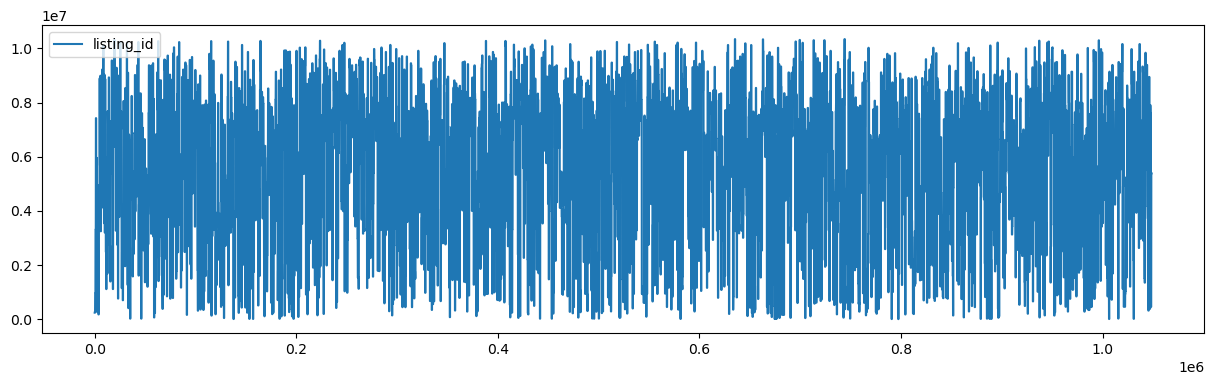

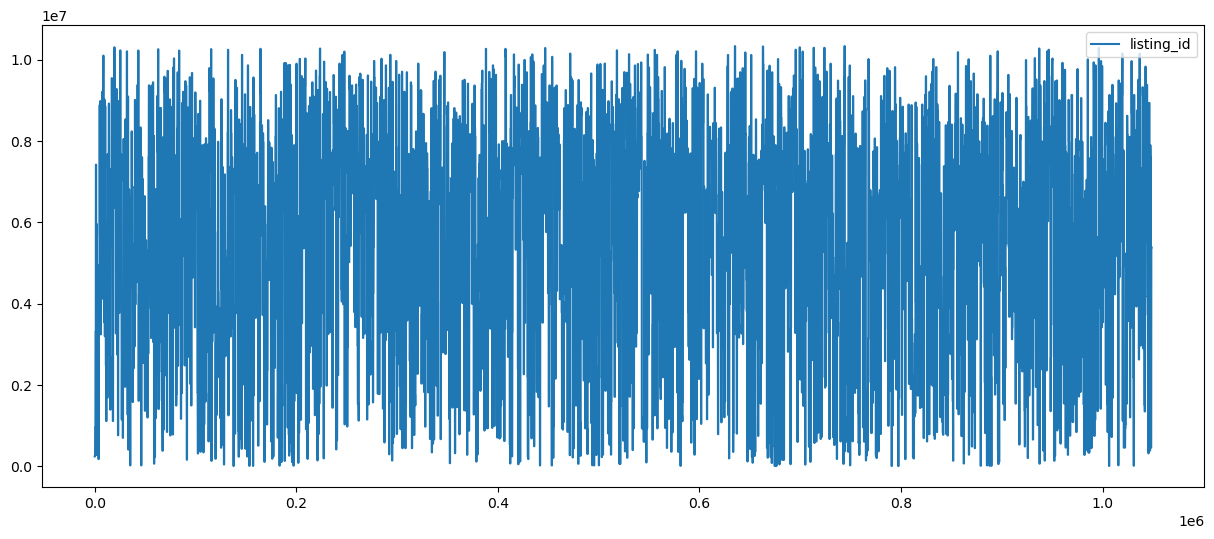

In [11]:
calendar.plot(figsize=(15,4))
calendar.plot(subplots=True, figsize=(15,6))
calendar.plot(x="price", y=["date"], style='.')